In [3]:
#load the dataset and inspect the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset2 = pd.read_csv("/home/queen/Desktop/python/fproject/credit_approval/application_record.csv")
#dataset2 has features that we can use to make predictions(client personal info)
#inspect the data
print(dataset2.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [5]:
#users behaviour of credit card
dataset3 = pd.read_csv("/home/queen/Desktop/python/fproject/credit_approval/credit_record.csv")
print(dataset3.head())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C


In [6]:
#statistics description of the data
dataset2_desc = dataset2.describe()
#display the result
print(dataset2_desc)

print("\n\n")


dataset3_desc = dataset3.describe()
print(dataset3_desc)

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000

In [7]:
#print out the info about the dataset
dataset2_info = dataset2.info()
print(dataset2_info)

print("\n\n")

#dataset 3
dataset3_info = dataset3.info()
print(dataset3_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
#combine the two datasets #NaN shows the missing values
final_dataset = pd.merge(dataset2, dataset3, on='ID', how ='inner')
print(final_dataset.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005

<AxesSubplot:>

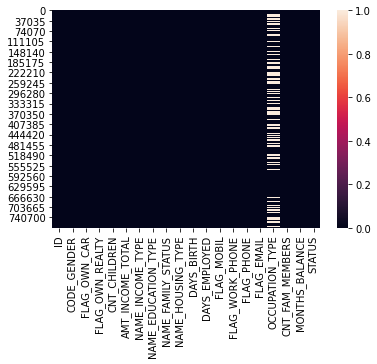

In [9]:
#check for null values
sns.heatmap(final_dataset.isnull())

In [10]:
#we delete the duplicates in columns
final_dataset = final_dataset.drop_duplicates('ID', keep = 'last')

In [11]:
#we drop the occupation column as it has null values
final_dataset.drop('OCCUPATION_TYPE', axis=1, inplace =True)

In [12]:
print(final_dataset.tail(10))

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
777538  5149145           M            Y               Y             0   
777567  5149158           M            Y               Y             0   
777579  5149190           M            Y               N             1   
777601  5149729           M            Y               Y             0   
777621  5149775           F            Y               Y             0   
777633  5149828           M            Y               Y             0   
777657  5149834           F            N               Y             0   
777690  5149838           F            N               Y             0   
777700  5150049           F            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
777538          247500.0               Working  Secondary / secondary special   
777567          247500.

In [13]:
#preprocessing the data
#label encoding to convert non_numeric data to numeric data this makes calculations easy
from sklearn import preprocessing

#instantiate the LabelEncoder
le = preprocessing.LabelEncoder()

#iterate over the columns and extract their dtypes
for col in final_dataset:
    if final_dataset[col].dtypes == 'object':
        le.fit(final_dataset[col])
        final_dataset[col] = le.transform(final_dataset[col])
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 15 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_EDUCATION_TYPE  36457 non-null  int64  
 8   NAME_FAMILY_STATUS   36457 non-null  int64  
 9   NAME_HOUSING_TYPE    36457 non-null  int64  
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-nul

In [14]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split
# Segregate features and labels into separate variables
X = final_dataset.iloc[:,1:-1] # X value contains all the variables except labels
y = final_dataset.iloc[:,-1] # these are the labels
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state=42)#ensures that the splits are reproducable

In [15]:
#scaling before we fit our model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

In [16]:
#fit the logistic regression model
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
# Fit logreg to the train set
logreg.fit(X_trainScaled, y_train)

/home/queen/Desktop/python/fproject/stock_prices/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_testScaled)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_testScaled, y_test).round(4))

# Print the confusion matrix of the logreg model
#the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications)
#the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) 
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.5931
[[7130    0    0    0    2]
 [   4    0    0    0    0]
 [   1    0    0    0    0]
 [  95    0    0    0    0]
 [4793    0    0    0    6]]


In [18]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [300,350,400]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

In [ ]:
#Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid= param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
XScaled = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(XScaled, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))